In [1]:
# example of Exploratory Data Analysis with Python
# taken from: https://www.kaggle.com/code/robikscube/introduction-to-exploratory-data-analysis/notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# use default matplotlibrc 
plt.style.use('default') 
import seaborn as sns
from IPython import embed
# read data
df = pd.read_csv('coaster_db.csv')

# 1. Understanding our Data Set
- Show dataframe contents
- Basic statistics

In [2]:
# shape of dataframe
print("Dataframe shape = ", df.shape)
# show first 5 rows of dataframe
df.head(5)

Dataframe shape =  (1087, 56)


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
# show basic statistics of our dataset using the describe() method
print("Basic dataframe statistics:\n", df.describe())

Basic dataframe statistics:
        Inversions  year_introduced    latitude   longitude  speed1_value  \
count  932.000000      1087.000000  812.000000  812.000000    937.000000   
mean     1.547210      1994.986201   38.373484  -41.595373     53.850374   
std      2.114073        23.475248   15.516596   72.285227     23.385518   
min      0.000000      1884.000000  -48.261700 -123.035700      5.000000   
25%      0.000000      1989.000000   35.031050  -84.552200     40.000000   
50%      0.000000      2000.000000   40.289800  -76.653600     50.000000   
75%      3.000000      2010.000000   44.799600    2.778100     63.000000   
max     14.000000      2022.000000   63.230900  153.426500    240.000000   

        speed_mph  height_value   height_ft  Inversions_clean  Gforce_clean  
count  937.000000    965.000000  171.000000       1087.000000    362.000000  
mean    48.617289     89.575171  101.996491          1.326587      3.824006  
std     16.678031    136.246444   67.329092         

In [4]:
# print column types
print(df.dtypes.head(10))

coaster_name          object
Length                object
Speed                 object
Location              object
Status                object
Opening date          object
Type                  object
Manufacturer          object
Height restriction    object
Model                 object
dtype: object


# 2. Data Preparation
- Drop irrelevant columns and rows
- Indentify duplicated columns
- Rename columns
- Create features

In [5]:
# let's use the columns information to drop the columns we don't want to use but to keep track of unused information
df = df[['coaster_name', 
        # 'Length', 'Speed', 
        'Location', 'Status', 
        # 'Opening date', 'Type', 
        'Manufacturer', 
        # 'Height restriction', 'Model', 'Height',
        # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
        # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
        # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
        # 'Track layout', 'Fastrack available', 'Soft opening date.1',
        # 'Closing date', 'Opened', 'Replaced by', 'Website',
        # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
        # 'Single rider line available', 'Restraint Style',
        # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
        # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
        # 'height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
# and we make a copy of the df

In [6]:
# rewrite the opening_date_clean column to ensure it is a datetime type
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
print(df.dtypes)

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object


In [7]:
# rename column names to lowercase only
df.columns = df.columns.str.lower()

In [8]:
# checking if there are missing data
print("Total NaN in dataframe:\n")
print(df.isna().sum())
# and if there are duplicates in our data
print("\nDuplicates:\n")
print(df.duplicated(subset='coaster_name'))

Total NaN in dataframe:

coaster_name            0
location                0
status                213
manufacturer           59
year_introduced         0
latitude              275
longitude             275
type_main               0
opening_date_clean    250
speed_mph             150
height_ft             916
inversions_clean        0
gforce_clean          725
dtype: int64

Duplicates:

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool


In [9]:
# checking an exaple of duplicates by making a query using an specific column variable
print("nChecking example of duplicates quering an specific coaster name:")
print(df.query('coaster_name == "Derby Racer"'))

nChecking example of duplicates quering an specific coaster name:
   coaster_name      location   status    manufacturer  year_introduced  \
14  Derby Racer  Revere Beach  Removed  Fred W. Pearce             1911   
60  Derby Racer  Revere Beach  Removed  Fred W. Pearce             1937   

    latitude  longitude type_main opening_date_clean  speed_mph  height_ft  \
14     42.42    -70.986      Wood         1911-01-01        NaN        NaN   
60     42.42    -70.986      Wood         1911-01-01        NaN        NaN   

    inversions_clean  gforce_clean  
14                 0           NaN  
60                 0           NaN  


In [10]:
# now we will drop duplicated rows by matching on desired conditions
df = df.loc[~df.duplicated(subset=['coaster_name', 'location', 'opening_date_clean'])].reset_index(drop=True).copy()
print("\nResulting dataframe shape after dropping duplicated rows (coaster_name, location, opening_date):", df.shape)


Resulting dataframe shape after dropping duplicated rows (coaster_name, location, opening_date): (990, 13)


# 3. Feature Understanding
Univariate analysis (histograms, distributions, etc)

In [11]:
# Count values of a given parameter using 'value_counts' in a pd Series
df.sort_values('year_introduced', ascending=False)['year_introduced'].value_counts().head(15)

1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2011    24
2007    24
2013    23
2012    23
2006    23
1996    23
2015    22
1995    22
Name: year_introduced, dtype: int64

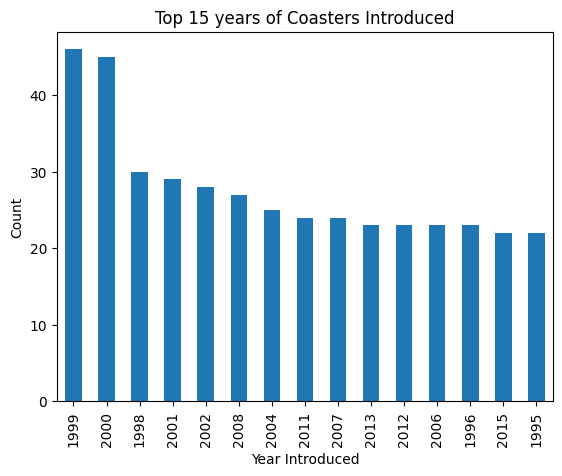

In [12]:
# now plot this information using a bar plot
ax = df.sort_values('year_introduced', ascending=False)['year_introduced'].value_counts().head(15).plot(kind='bar', title='Top 15 years of Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')
plt.show()

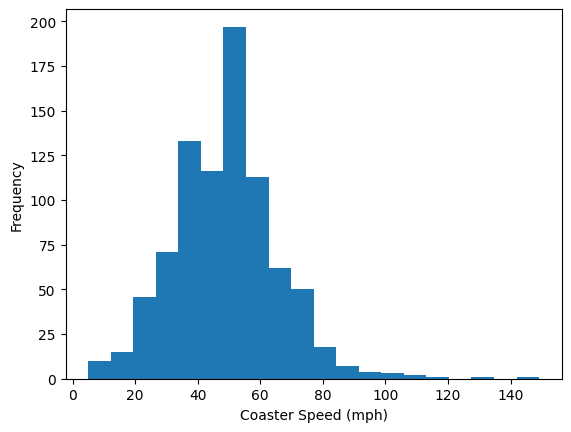

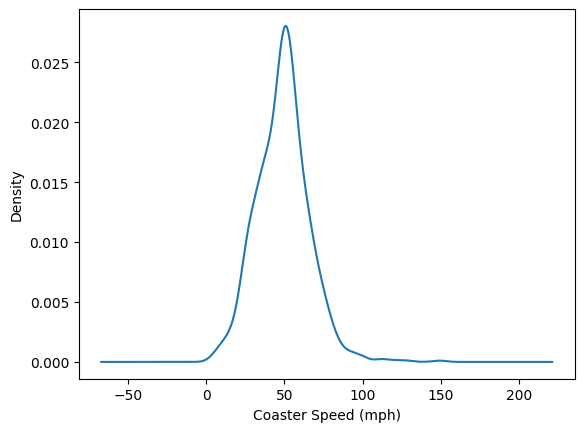

In [13]:
# Plot distribution of a parameter
fig = plt.figure()
ax2 = df['speed_mph'].plot(kind='hist', bins=20)
ax2.set_xlabel('Coaster Speed (mph)')
# another way to look at features is makinga density plot
fig = plt.figure()
ax3 = df['speed_mph'].plot(kind='kde')
ax3.set_xlabel('Coaster Speed (mph)')
plt.show()

# 4. Feature Relationships
- Scatterplots
- Correlation matrix (heatmap)
- Pairplots
- Groupby comparisons

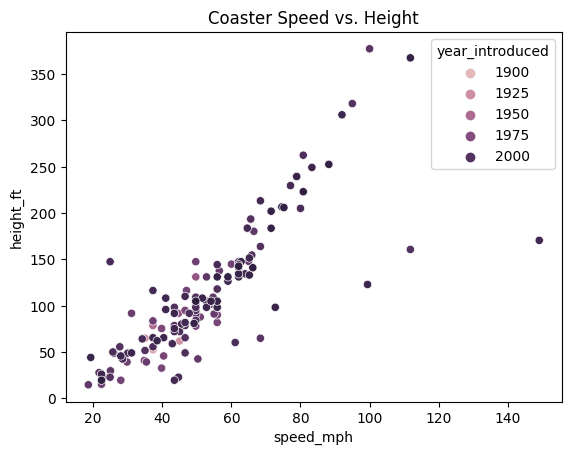

In [14]:
# let's start by looking at a scatter plot
fig = plt.figure()
ax4 = sns.scatterplot(x='speed_mph',
                y='height_ft',
                hue='year_introduced',
                data=df)
ax4.set_title('Coaster Speed vs. Height')
plt.show()

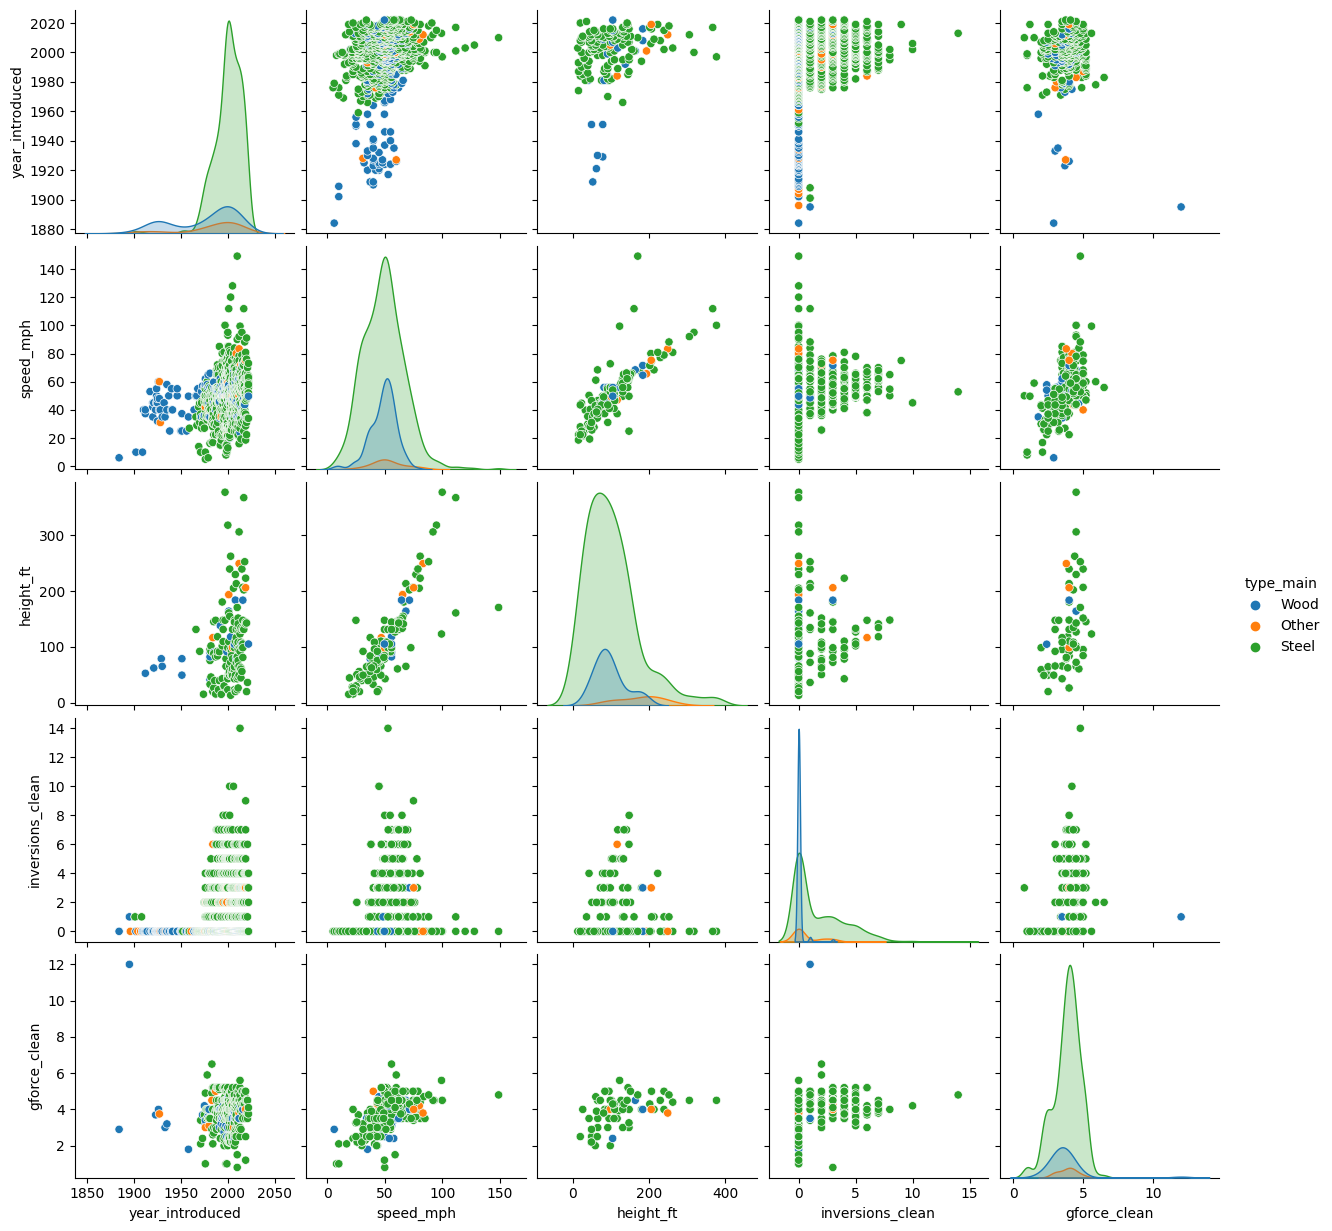

In [15]:
# we can get a bigger picture of how different variables relate to each other by making pairplots
ax5 = sns.pairplot(df,
              vars=['year_introduced', 'speed_mph', 'height_ft', 'inversions_clean', 'gforce_clean'],
              hue='type_main')
plt.show()



Correlation matrix:


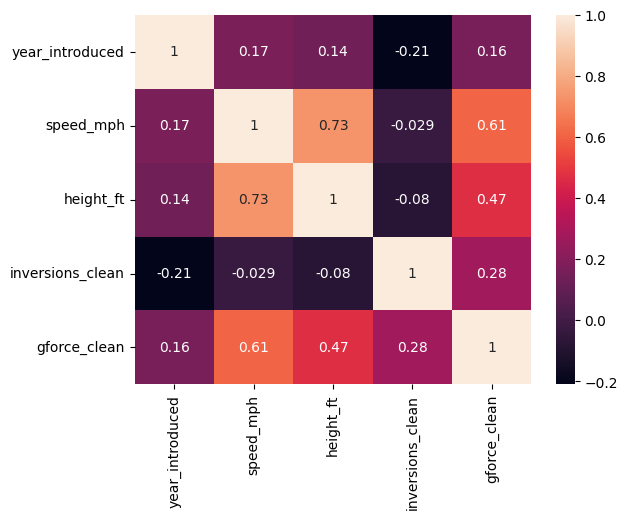

In [20]:
# another feature is to look at correlation between parameters
corr = df[['year_introduced', 'speed_mph', 'height_ft', 'inversions_clean', 'gforce_clean']].dropna().corr()
print("\nCorrelation matrix:")

fig = plt.figure()
ax6 = sns.heatmap(corr, annot=True)
plt.show()

# Question About our Data
Finally, we will make a question about our data to see how to extract a particular piece of information.
The question is:
```bash
What are the locations with the fastest roller coaster (with at least 10)?
```

In [22]:
# first of all we remove the 'Other' location from our set using a query
query = df.query('location != "Other"').groupby('location')['speed_mph'] \
        .agg(['mean', 'count']) \
        .query('count >= 10') \
        .sort_values('mean')

print("\nFilter locations with the fastest rollercoasters (minimum 10):\n")
print(query)


Filter locations with the fastest rollercoasters (minimum 10):

                                 mean  count
location                                    
Alton Towers                42.791667     12
Carowinds                   43.571429     14
Kings Island                49.273684     19
Hersheypark                 50.576923     13
Kings Dominion              52.083333     12
Six Flags Great Adventure   53.036364     11
Canada's Wonderland         53.533333     12
Six Flags Magic Mountain    57.241176     17
Cedar Point                 57.833333     18
Busch Gardens Williamsburg  58.318182     11


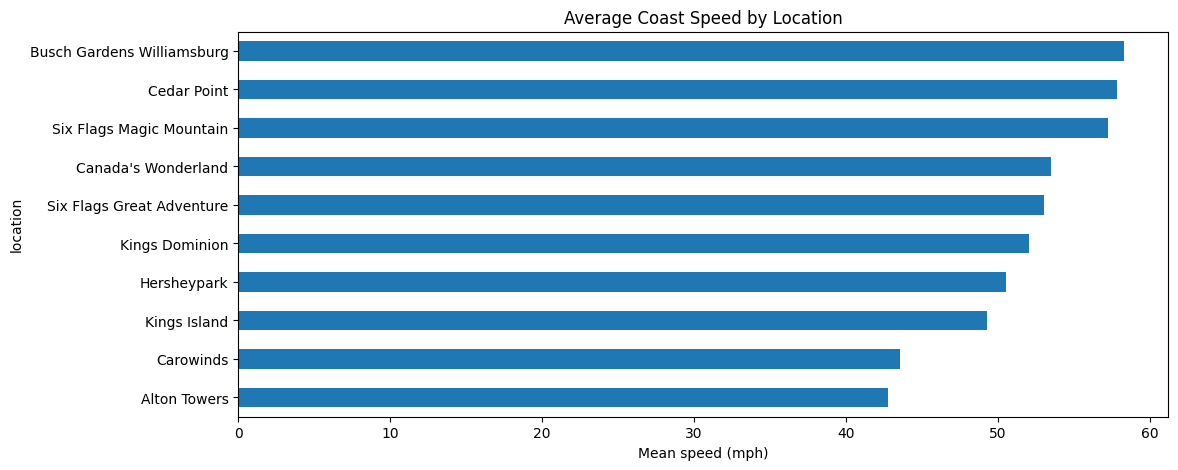

In [23]:
# then, plot it
fig = plt.figure()
ax7 = query['mean'].plot(kind='barh', figsize=(12,5), title='Average Coast Speed by Location')
ax7.set_xlabel('Mean speed (mph)')

plt.show()